# Processing stream data from http://data.water.vic.gov.au/monitoring.htm

In [11]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stream_data_folder = r"C:\Workspace\part0075\MDB modelling\Campaspe_data\SW\All_streamflow_Campaspe_catchment\Updated"
working_directory = stream_data_folder
site_details_file = "Site Details.csv"
site_details = pd.read_csv(os.path.join(working_directory, site_details_file))

In [20]:
site_details['Site Name']

0                 COLIBAN RIVER @ MALMSBURY RAIL BRIDGE
1                            CAMPASPE RIVER @ BARNADOWN
2     CAMPASPE RIVER @ ROCHESTER D/S WARANGA WESTERN...
3                        CAMPASPE RIVER @ CAMPASPE WEIR
4                               CAMPASPE RIVER @ ELMORE
5                              CAMPASPE RIVER @ AXEDALE
6                             CAMPASPE RIVER @ EPPALOCK
7                            CAMPASPE RIVER @ ASHBOURNE
8                            CAMPASPE RIVER @ CARLSRUHE
9          COLIBAN RIVER DOWNSTREAM LAURISTON RESERVOIR
10                           CAMPASPE RIVER @ REDESDALE
11                                  AXE CREEK @ LONGLEA
12                                 COLIBAN RIVER @ LYAL
13                                AXE CREEK @ SEDGEWICK
14                       SHEEPWASH CREEK @ TANNERY LANE
15          CAMPASPE RIVER @ CAMPASPE WEIR (HEAD GAUGE)
16          CAMPASPE RIVER @ LAKE EPPALOCK (HEAD GAUGE)
17     COLIBAN RIVER @ MALMSBURY RESERVOIR (HEAD

Filter based on whether Site Name contains "Campaspe" ...

In [21]:
Campaspe = site_details[site_details['Site Name'].str.contains("CAMPASPE RIVER")| \
                        site_details['Site Name'].str.contains("AXE CREEK")| \
                        site_details['Site Name'].str.contains("MOUNT PLEASANT CREEK")]
Campaspe = Campaspe[Campaspe['Northing'] >= \
                    Campaspe.loc[6]['Northing']]
Campaspe

,Site Id,Site Name,Latitude,Longitude,Easting,Northing,Zone,Gauge Zero (Ahd),Site Start Date,Site Cease Date,Drainage Area (Sq.km),Cease to flow level,Min value
1,406201,CAMPASPE RIVER @ BARNADOWN,-36.629210,144.554501,281337.0,5943460.0,55,132.489,1881/03/01,NaN,2528.0,1.229,NaN
2,406202,CAMPASPE RIVER @ ROCHESTER D/S WARANGA WESTERN...,-36.331931,144.700967,293648.0,5976767.0,55,103.615,1885/01/01,NaN,3398.0,1.366,NaN
3,406203,CAMPASPE RIVER @ CAMPASPE WEIR,-36.438056,144.658250,290098.9,5964900.4,55,111.932,1/07/1908,20/08/1976,3269.0,0.000,NaN
4,406205,CAMPASPE RIVER @ ELMORE,-36.498417,144.611806,286101.2,5958101.1,55,115.511,1/12/1945,31/12/1964,3147.0,4.801,NaN
5,406206,CAMPASPE RIVER @ AXEDALE,-36.792778,144.506306,277499.4,5925199.9,55,0.000,1/01/1919,2/08/1965,2150.0,0.000,NaN
6,406207,CAMPASPE RIVER @ EPPALOCK,-36.843321,144.530181,279775.0,5919647.0,55,0.000,14/04/1931,NaN,2028.0,152.752,NaN
11,406214,AXE CREEK @ LONGLEA,-36.773492,144.428105,270463.0,5927155.0,55,167.542,10/03/1965,NaN,234.0,0.303,NaN
15,406218,CAMPASPE RIVER @ CAMPASPE WEIR (HEAD GAUGE),-36.436388,144.658981,290160.0,5965087.0,55,0.000,1893/07/01,NaN,3269.0,-1.020,119.083
20,406224,MOUNT PLEASANT CREEK @ RUNNYMEDE,-36.545656,144.637705,288550.0,5952917.0,55,129.990,21/06/1974,NaN,248.0,0.994,0.311
26,406262,AXE CREEK @ STRATHFIELDSAYE,-36.810917,144.391211,267283.0,5922913.0,55,0.000,23/05/1989,NaN,83.0,1.100,0.476


NameError: name 'point_merge2' is not defined

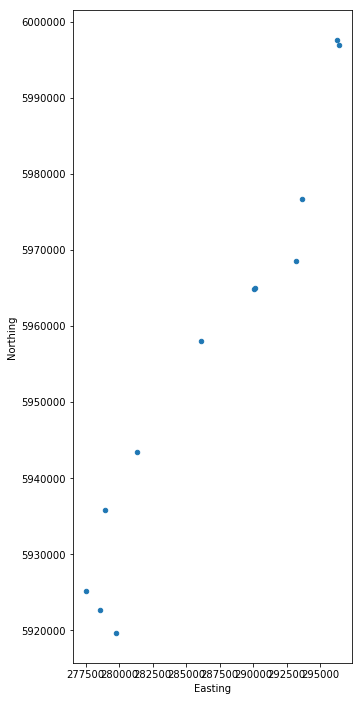

In [8]:
fig = plt.figure(figsize=(5,12))
ax = fig.add_subplot(111)
Campaspe.plot(kind='scatter', x='Easting', y='Northing', ax=ax)
ax.plot([x[0] for x in point_merge2], [x[1] for x in point_merge2], alpha = 0.3)
for k, v in Campaspe.iterrows():
    #print k, v, v['Site Name']
    ax.annotate(v['Site Name'], xy=(v['Easting'], v['Northing']))
plt.axes().set_aspect('equal', 'datalim')

### Assessing river sampling stations to estimate bed elevations along the river
Makes use of the following information if it exsits for each site (in mAHD) in the site details file:
1. gauge zero,
2. cease to flow level, or
3. min level

In [22]:
Campaspe_gauge_zero = Campaspe[(Campaspe['Gauge Zero (Ahd)'] > 0.0) | \
                               (Campaspe['Cease to flow level'] > 10.0) | \
                               (Campaspe['Min value'] > 10.0)]
Campaspe_gauge_zero

,Site Id,Site Name,Latitude,Longitude,Easting,Northing,Zone,Gauge Zero (Ahd),Site Start Date,Site Cease Date,Drainage Area (Sq.km),Cease to flow level,Min value
1,406201,CAMPASPE RIVER @ BARNADOWN,-36.629210,144.554501,281337.0,5943460.0,55,132.489,1881/03/01,NaN,2528.0,1.229,NaN
2,406202,CAMPASPE RIVER @ ROCHESTER D/S WARANGA WESTERN...,-36.331931,144.700967,293648.0,5976767.0,55,103.615,1885/01/01,NaN,3398.0,1.366,NaN
3,406203,CAMPASPE RIVER @ CAMPASPE WEIR,-36.438056,144.658250,290098.9,5964900.4,55,111.932,1/07/1908,20/08/1976,3269.0,0.000,NaN
4,406205,CAMPASPE RIVER @ ELMORE,-36.498417,144.611806,286101.2,5958101.1,55,115.511,1/12/1945,31/12/1964,3147.0,4.801,NaN
6,406207,CAMPASPE RIVER @ EPPALOCK,-36.843321,144.530181,279775.0,5919647.0,55,0.000,14/04/1931,NaN,2028.0,152.752,NaN
11,406214,AXE CREEK @ LONGLEA,-36.773492,144.428105,270463.0,5927155.0,55,167.542,10/03/1965,NaN,234.0,0.303,NaN
15,406218,CAMPASPE RIVER @ CAMPASPE WEIR (HEAD GAUGE),-36.436388,144.658981,290160.0,5965087.0,55,0.000,1893/07/01,NaN,3269.0,-1.020,119.083
20,406224,MOUNT PLEASANT CREEK @ RUNNYMEDE,-36.545656,144.637705,288550.0,5952917.0,55,129.990,21/06/1974,NaN,248.0,0.994,0.311
29,406265,CAMPASPE RIVER @ ECHUCA,-36.144721,144.735339,296248.0,5997610.0,55,0.000,18/04/1991,NaN,0.0,87.397,87.321


NameError: name 'point_merge2' is not defined

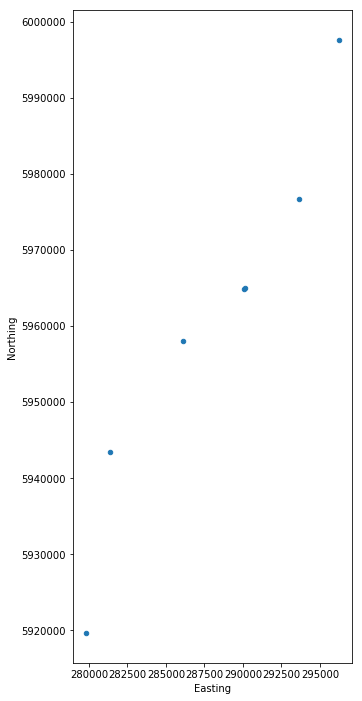

In [10]:
fig = plt.figure(figsize=(5,12))
ax = fig.add_subplot(111)
Campaspe_gauge_zero.plot(kind='scatter', x='Easting', y='Northing', ax=ax)
ax.plot([x[0] for x in point_merge2], [x[1] for x in point_merge2], alpha = 0.3)
for k, v in Campaspe_gauge_zero.iterrows():
    #print k, v, v['Site Name']
    ax.annotate(v['Site Name'], xy=(v['Easting'], v['Northing']))
plt.axes().set_aspect('equal', 'datalim')


### Function to process flow files including filtering of data based on quality codes

In [13]:
def getFlow(path=None, start_date=None, end_date=None, summary=False, sites=None):
    if path == None:
        path = working_directory
    #end if
    site_details_file = "Site Details.csv"
    site_details = pd.read_csv(os.path.join(path, site_details_file))
    flow_files = [x for x in os.listdir(path) if "MeanWaterFlow" in x]

    if type(sites) != 'NoneType':
        flow_files = [x for x in flow_files if int(x.split('.')[0]) in sites]

    flow_stations = [int(x.split('.')[0]) for x in flow_files]
    
    relevant_data = {'Site ID':[], 'Site Name':[], 'Easting':[], 'Northing':[], 'Mean flow (m3/s)':[], 'Max flow (m3/s)':[], '5th percentile flow (m3/s)':[], 'Min flow (m3/s)':[]}
    
    processed_river_sites_ts = {}
    
    for index, flow_file in enumerate(flow_files):
        flow_file_df = pd.read_csv(os.path.join(path, flow_file), skiprows=2, index_col='Date', parse_dates=True, dayfirst=True)
        if start_date != None:
            flow_file_df = flow_file_df.ix[start_date:end_date]
        #end if

        qual_codes_to_ignore = [8, 9, 21, 100, 101, 120, 149, 150, 151, 152, 
                                153, 154, 155, 156, 160, 161, 165, 180, 190, 
                                200, 201, 237, 250, 254, 255]
        #qual_codes_to_include = [1, 2, 82]
        flow_file_df.drop(flow_file_df[flow_file_df['Qual'].isin(qual_codes_to_ignore)].index, inplace=True)

        if flow_file_df.empty:
            continue
        #end if
        
        #flow_file_df = flow_file_df.fillna(0) 
        if flow_file_df['Mean'].max() == 0:
            continue
        #end if
        relevant_site_details = site_details[site_details['Site Id']==[flow_stations[index]]]

        relevant_data['Site ID'] += [relevant_site_details['Site Id'].values[0]]
        relevant_data['Site Name'] += [relevant_site_details['Site Name'].values[0]]
        relevant_data['Easting'] += [float(relevant_site_details['Easting'])]
        relevant_data['Northing'] += [float(relevant_site_details['Northing'])]
        relevant_data['Mean flow (m3/s)'] += [flow_file_df['Mean'].mean() * 1000. / 86400]
        relevant_data['Max flow (m3/s)'] += [flow_file_df['Mean'].max() * 1000. / 86400]
        relevant_data['Min flow (m3/s)'] += [flow_file_df['Mean'].min() * 1000. / 86400]
        relevant_data['5th percentile flow (m3/s)'] += [flow_file_df['Mean'].quantile(q=0.05) * 1000. / 86400]
    
    
        processed_river_sites_ts[flow_stations[index]] = flow_file_df
    # end for    
    
    processed_river_sites = pd.DataFrame(relevant_data)
    return processed_river_sites, processed_river_sites_ts

In [23]:
flows, flows_ts = getFlow(sites=Campaspe['Site Id'].tolist())

Let's sort the data from upstream to downstream using the Northing

In [24]:
flows = flows.sort_values(by='Northing')
flows

,5th percentile flow (m3/s),Easting,Max flow (m3/s),Mean flow (m3/s),Min flow (m3/s),Northing,Site ID,Site Name
2,0.078779,279775.0,114.314583,1.561308,0.028588,5919647.0,406207,CAMPASPE RIVER @ EPPALOCK
5,0.000000,267283.0,14.998958,0.120643,0.000000,5922913.0,406262,AXE CREEK @ STRATHFIELDSAYE
3,0.000000,270463.0,86.474306,0.469486,0.000000,5927155.0,406214,AXE CREEK @ LONGLEA
0,0.126273,281337.0,351.743750,5.170976,0.000000,5943460.0,406201,CAMPASPE RIVER @ BARNADOWN
4,0.000000,288550.0,68.333102,0.206141,0.000000,5952917.0,406224,MOUNT PLEASANT CREEK @ RUNNYMEDE
1,0.000000,293648.0,570.381597,4.968969,0.000000,5976767.0,406202,CAMPASPE RIVER @ ROCHESTER D/S WARANGA WESTERN...
6,0.011551,296248.0,41.428588,0.645976,0.000000,5997610.0,406265,CAMPASPE RIVER @ ECHUCA


Let's look at the average monthly flows for sites that had useful data:

In [27]:
flows.shape[0]

7

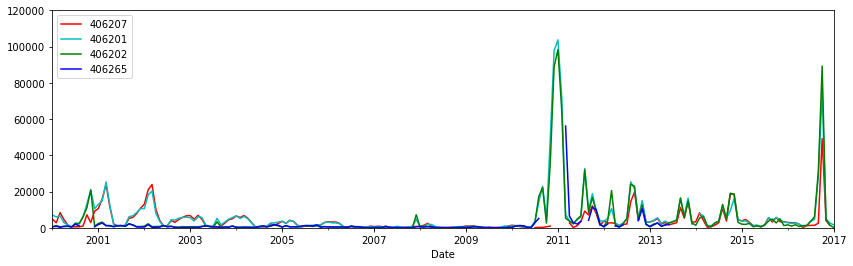

In [54]:
fig = plt.figure(figsize=(14, 4))
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = 'rgbcrgb'
ax = fig.add_subplot(111)

for index, key in enumerate(flows['Site ID']):
    if key not in [406207, 406201, 406202, 406265]:
        continue
    #ax = fig.add_subplot(flows.shape[0], 1, index + 1)
    df_temp = flows_ts[key][flows_ts[key].index > datetime.datetime(2000,1,1)].resample('M').sum()
    #df_temp = pd.groupby(df_temp, by=[df_temp.index.month]).mean()
    #df_temp['Months'] = Months
    #df_temp.plot(kind='bar', x='Months', y='Mean', style='.', color=colors[index], label=key, alpha=1.0, ax=ax)
    df_temp.plot(y='Mean', color=colors[index], ax=ax, label=key)
    if index != flows.shape[0] - 1:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    if index == 1:
        ax.set_ylabel("Summed monthly flow (m$^3$/day)")
    #ax.set_xlim(x_lim)
    ax.set_ylim(0, 120000)
    #print(key, flows_ts[key].index[-1])
#ax.set_ylim(0,100)   
#legend = ax.legend()
#legend.remove()

Get the mean flow for each of the stations:

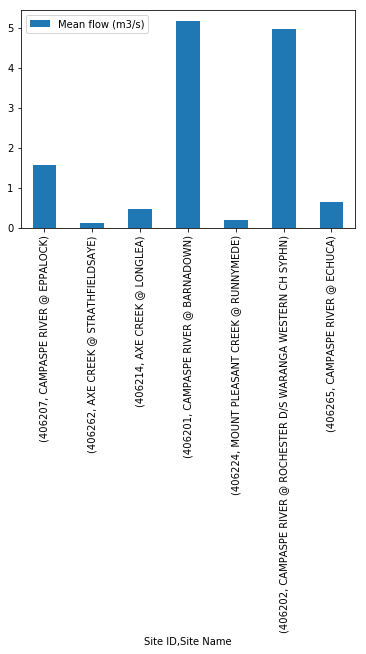

In [31]:
flows.plot(kind='bar', x=['Site ID', 'Site Name'], y=['Mean flow (m3/s)'])

NameError: name 'point_merge2' is not defined

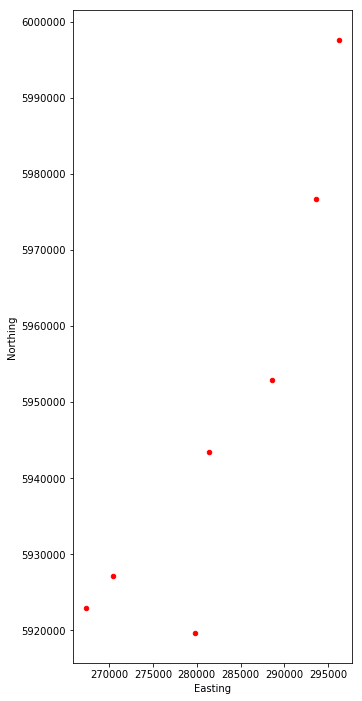

In [55]:
fig = plt.figure(figsize=(5,12))
ax = fig.add_subplot(111)
flows.plot(kind='scatter', x='Easting', y='Northing', color='r', ax=ax)
ax.plot([x[0] for x in point_merge2], [x[1] for x in point_merge2], alpha = 0.3)
for k, v in flows.iterrows():
    #print k, v, v['Site Name']
    ax.annotate(v['Site Name'], xy=(v['Easting'], v['Northing']))
plt.axes().set_aspect('equal', 'datalim')

## Function to read river levels 

In [56]:
def getStage(path=None, start_date=None, end_date=None, summary=True, sites=None):
    '''
    Function to process flow data from the "Water Measurement Information System"
    located at http://data.water.vic.gov.au/monitoring.htm
    
    '''
    
    if path == None:
        path = working_directory
    #end if
    site_details_file = "Site Details.csv"
    site_details = pd.read_csv(os.path.join(path, site_details_file))

    stage_files = [x for x in os.listdir(path) if "MeanWaterLevel" in x]
                   
    stage_stations = [int(x.split('.')[0]) for x in stage_files]

    if type(sites) != 'NoneType':
        stage_files = [x for x in stage_files if int(x.split('.')[0]) in sites]

    
    relevant_data = {'Site ID':[], 'Site Name':[], 'Easting':[], 'Northing':[], 
                     'Mean stage (m)':[], 'High stage (m)':[], '5th percentile stage (m)':[], 
                     'Low stage (m)':[], 'Gauge Zero (Ahd)':[]}
    
    processed_river_sites_stage_ts = {}
    
    for index, stage_file in enumerate(stage_files):
        stage_file_df = pd.read_csv(os.path.join(path, stage_file), skiprows=2, index_col='Date', \
                                    parse_dates=True, dayfirst=True)
        if start_date != None:
            stage_file_df = stage_file_df.ix[start_date:end_date]    
        #end if
        if stage_file_df.empty:
            print 'No data at provided dates for: ', stage_file        
            continue
        #end if 
        stage_file_df = stage_file_df.fillna(0)        
        if stage_file_df['Mean'].max() == 0:
            print 'Level reading is 0, so ignoring for: ', stage_file        
            continue
        
        qual_codes_to_ignore = [8, 9, 21, 100, 101, 120, 149, 150, 151, 152, 
                                153, 154, 155, 156, 160, 161, 165, 180, 190, 
                                200, 201, 237, 250, 254, 255]
        #qual_codes_to_include = [1, 2, 82]
        stage_file_df.drop(stage_file_df[stage_file_df['Qual'].isin(qual_codes_to_ignore)].index, inplace=True)
        #stage_file_df = stage_file_df[stage_file_df['Qual'].isin(qual_codes_to_include)]
        
        stage_id = int(stage_file.split('.')[0])
        
        relevant_site_details = site_details[site_details['Site Id']==stage_id]

        if summary:
            mean_stage = stage_file_df['Mean'].mean()
            high_stage = stage_file_df['Mean'].max()
            low_fifth_stage = stage_file_df['Mean'].quantile(q=0.05)
            low_stage = stage_file_df['Mean'].min()
            if mean_stage < 10.0:
                if float(relevant_site_details['Gauge Zero (Ahd)']) > 0.:
                    mean_stage += float(relevant_site_details['Gauge Zero (Ahd)'])
                    stage_file_df['Mean'] = stage_file_df['Mean'] + float(relevant_site_details['Gauge Zero (Ahd)']) 
                elif float(relevant_site_details['Cease to flow level']) > 10.:
                    mean_stage += float(relevant_site_details['Cease to flow level'])
                    stage_file_df['Mean'] = stage_file_df['Mean'] + float(relevant_site_details['Cease to flow level']) 
                elif float(relevant_site_details['Min value']) > 10.:
                    mean_stage += float(relevant_site_details['Min value'])
                    stage_file_df['Mean'] = stage_file_df['Mean'] + float(relevant_site_details['Min value']) 
                else:
                    print 'Mean value of stage less than 10m and Gauge Zero not known, so ignoring for: ', stage_file
                    continue

            mean_stage = stage_file_df['Mean'].mean()
            high_stage = stage_file_df['Mean'].max()
            low_fifth_stage = stage_file_df['Mean'].quantile(q=0.05)
            low_stage = stage_file_df['Mean'].min()

            relevant_data['Site ID'] += [relevant_site_details['Site Id'].values[0]]
            relevant_data['Site Name'] += [relevant_site_details['Site Name'].values[0]]
            relevant_data['Easting'] += [float(relevant_site_details['Easting'])]
            relevant_data['Northing'] += [float(relevant_site_details['Northing'])]
            relevant_data['Mean stage (m)'] += [mean_stage]
            relevant_data['High stage (m)'] += [high_stage]
            relevant_data['5th percentile stage (m)'] += [low_fifth_stage]
            relevant_data['Low stage (m)'] += [low_stage]
            relevant_data['Gauge Zero (Ahd)'] += [float(relevant_site_details['Gauge Zero (Ahd)'])]
        # end if
        processed_river_sites_stage_ts[stage_id] = stage_file_df        
    # end for

    processed_river_sites_stage = pd.DataFrame(relevant_data)
    processed_river_sites_stage.to_csv(os.path.join(working_directory,'processed_river_sites_stage.csv'))

    if summary:
        return processed_river_sites_stage_ts, processed_river_sites_stage
    else:
        return processed_river_sites_stage_ts

In [57]:
levels_ts, levels = getStage(sites=Campaspe['Site Id'].tolist())

Mean value of stage less than 10m and Gauge Zero not known, so ignoring for:  406262.MeanWaterLevel.csv
Mean value of stage less than 10m and Gauge Zero not known, so ignoring for:  406275.MeanWaterLevel.csv
Mean value of stage less than 10m and Gauge Zero not known, so ignoring for:  406276.MeanWaterLevel.csv


In [58]:
levels =  levels.sort_values('Northing')

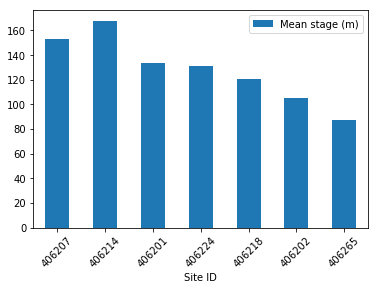

In [59]:
ax = levels.plot(kind='bar', x=['Site ID'], y=['Mean stage (m)'])
labels = ax.get_xmajorticklabels()
ax.set_xticklabels(labels, rotation=45)